In [1]:
import os
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white', {'xtick.bottom': True, 'ytick.left': True})
sns.set_context('notebook', font_scale=2)

In [2]:
# color scheme for figures
import visual_behavior.ophys.response_analysis.utilities as ut
colors = ut.get_colors_for_image_sets()

In [3]:
experiment_dir = '/media/brian/Seagate Portable Drive/brianhhu/data/visual_behavior_pilot_manuscript_initial_submission/'
model_dir = '/home/brian/data/stsp_final/noise_std_0.5_pos_weight_5_l2_pen_0.001_patience_5/RESULT/'

In [4]:
manifest = pd.read_csv(os.path.join(experiment_dir,'visual_behavior_data_manifest.csv'))

In [5]:
selected_data = manifest[(manifest.cre_line=='Slc17a7-IRES2-Cre')&  # Vip-IRES-Cre
                         (manifest.session_type=='behavior_session_A')] #&  # behavior_session_B, C, D
#                          (manifest.targeted_structure=='VISp')]  # VISp
selected_data

,experiment_id,experiment_container_id,targeted_structure,imaging_depth,cre_line,reporter_line,full_genotype,session_type,donor_id,specimen_id,experiment_date
8,639253368,639001089,VISp,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,334310,599659785,9/28/2017 14:14
12,661423848,661409179,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,355469,643316601,2/6/2018 15:03
16,670396087,670266085,VISp,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,355471,644831080,3/6/2018 13:37
28,692342909,692315205,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,369320,656813113,4/30/2018 16:09
40,729951441,729705760,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,382897,679238912,8/3/2018 10:11
44,715228642,715094648,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,384942,687987489,6/27/2018 13:08
48,720001924,719860866,VISp,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,384942,687987489,7/13/2018 14:33
52,719321260,719538773,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,385255,685152008,7/12/2018 10:27
64,754566180,754511300,VISp,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,401625,717693518,9/17/2018 15:13
84,768224465,768053094,VISp,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,407486,739783701,10/24/2018 14:21


In [6]:
experiment_id = selected_data.experiment_id.values
experiment_id

array([639253368, 661423848, 670396087, 692342909, 729951441, 715228642,
       720001924, 719321260, 754566180, 768224465, 760696146, 774379465,
       673139359])

In [7]:
from visual_behavior.ophys.dataset.visual_behavior_ophys_dataset import VisualBehaviorOphysDataset
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis 

# Go vs. catch responses

In [8]:
go_response_all = []
catch_response_all = []
adaptation_index_all = []

for e in experiment_id:
    dataset= VisualBehaviorOphysDataset(e, cache_dir=experiment_dir)
    analysis = ResponseAnalysis(dataset, use_events=False)  # dff or events?
    
    # get trials and flash dataframe
    tdf = analysis.trial_response_df
    fdf = analysis.flash_response_df
    
    # merge on change time
    fdf['change_time'] = fdf.start_time.values
    fdf = pd.merge(fdf, dataset.all_trials[['change_time', 'trial_type']],
                                 on='change_time', how='left')
    
# #     use go image vs. catch image
#     go_response = fdf[(fdf.engaged==True)&(fdf.trial_type=='go')].groupby('cell')['mean_response'].mean()
#     catch_response = fdf[(fdf.engaged==True)&(fdf.trial_type=='catch')].groupby('cell')['mean_response'].mean()

    # use pre-change image vs. change image response
    go_df = fdf[(fdf.engaged==True)&(fdf.trial_type=='go')]
    go_response = go_df.groupby('cell')['mean_response'].mean()
    catch_response = fdf[fdf.flash_number.isin(go_df.flash_number.unique()-1)].groupby('cell')['mean_response'].mean()
    
#     # rectify dF/F
#     go_response[go_response<0] = 0
#     catch_response[catch_response<0] = 0
    
    # adaptation index (to find maximum adaptation experiment)
    adaptation_index = (go_response - catch_response) / (go_response + catch_response)
    adaptation_index_all.append(adaptation_index.mean())
    
    # Save all experiments
    go_response_all.append(go_response)
    catch_response_all.append(catch_response)

loading trial response dataframe
loading flash response dataframe
loading omitted flash response dataframe
loading trial response dataframe
loading flash response dataframe
loading omitted flash response dataframe
loading trial response dataframe
loading flash response dataframe
loading omitted flash response dataframe
loading trial response dataframe
loading flash response dataframe
loading omitted flash response dataframe
loading trial response dataframe
loading flash response dataframe
loading omitted flash response dataframe
loading trial response dataframe
loading flash response dataframe
loading omitted flash response dataframe
loading trial response dataframe
loading flash response dataframe
loading omitted flash response dataframe
loading trial response dataframe
loading flash response dataframe
loading omitted flash response dataframe
loading trial response dataframe
loading flash response dataframe
loading omitted flash response dataframe
loading trial response dataframe
load

In [9]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, 'k--')

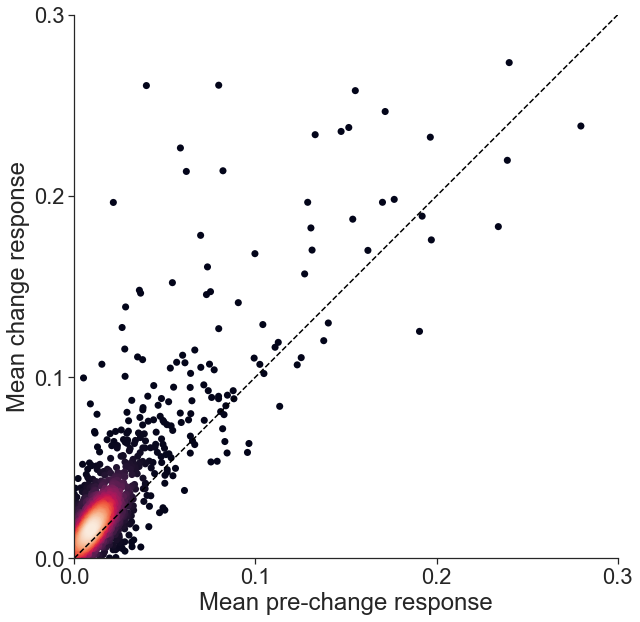

In [58]:
# turn off right and top spines
sns.set_style({'axes.spines.right': False, 'axes.spines.top': False})

from scipy.stats import gaussian_kde

# Calculate the point density
catch_response = pd.concat(catch_response_all).values
go_response = pd.concat(go_response_all).values

# Use only cells with positive mean go/catch responses
catch_response_pos = catch_response[(go_response>0)&(catch_response>0)]
go_response_pos = go_response[(go_response>0)&(catch_response>0)]

# Calculate the point density
# xy = np.vstack([catch_response,go_response])
xy = np.vstack([catch_response_pos,go_response_pos])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
# catch_response, go_response, z = catch_response[idx], go_response[idx], z[idx]
catch_response_pos, go_response_pos, z = catch_response_pos[idx], go_response_pos[idx], z[idx]

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(catch_response_pos, go_response_pos, c=z, s=50, edgecolor='')
ax.set_xlabel('Mean pre-change response')
ax.set_ylabel('Mean change response')
ax.set_xticks([0, 0.1, 0.2, 0.3])
ax.set_yticks([0, 0.1, 0.2, 0.3])
ax.set_xlim([0, 0.3])
ax.set_ylim([0, 0.3])
ax.set_aspect('equal')
abline(1,0)
plt.show()

In [22]:
fig.savefig('figures/change_prechange_neural_data_new.png', dpi=300, bbox_inches='tight')

In [59]:
go_values = pd.concat(go_response_all).values
catch_values = pd.concat(catch_response_all).values

# use cells with only positive mean go/catch responses
go_values_pos = go_values[(go_values>0)&(catch_values>0)]
catch_values_pos = catch_values[(go_values>0)&(catch_values>0)]

In [60]:
adaptation_index = (go_values_pos - catch_values_pos) / (go_values_pos + catch_values_pos)

In [61]:
from scipy.stats import sem

In [62]:
np.mean(adaptation_index), sem(adaptation_index)

(0.2522331670221489, 0.00639958595448819)

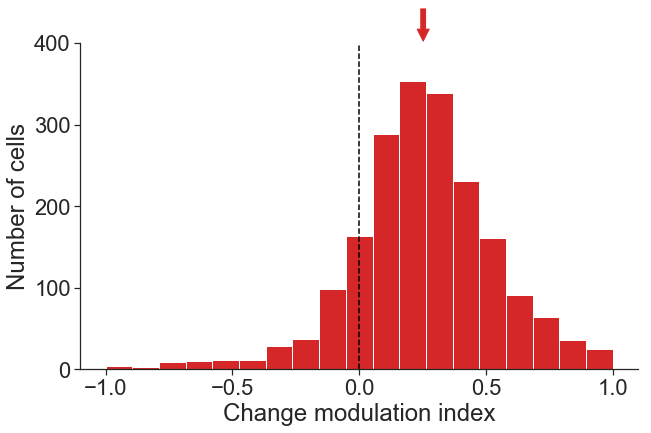

In [63]:
# adaptation_index = (go_values - catch_values) / (go_values + catch_values)
adaptation_index = (go_values_pos - catch_values_pos) / (go_values_pos + catch_values_pos)

fig, ax = plt.subplots(1,1,figsize=(10,6))
# ax.hist(adaptation_index[~np.isnan(adaptation_index)], bins=np.linspace(-1.5, 1.5, 20), color=colors[0])
ax.hist(adaptation_index[~np.isnan(adaptation_index)], bins=np.linspace(-1, 1, 20), color=colors[0])
ax.axvline(0.0, color='k', linestyle='--')
ax.set_ylim([0, 400])
ax.set_xlabel('Change modulation index')
ax.set_ylabel('Number of cells')
ax.annotate("",
            xy=(np.nanmean(adaptation_index), 400), xycoords='data',
            xytext=(np.nanmean(adaptation_index), (10./9)*400), textcoords='data',
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3",
                            color=colors[0]),
            )

plt.savefig('figures/adaptation_index_neural_data_new.png', dpi=300, bbox_inches='tight')

In [17]:
from scipy.stats import sem, wilcoxon

In [18]:
wilcoxon(adaptation_index)

WilcoxonResult(statistic=180638.0, pvalue=4.374395090402726e-214)

# visualize mean trial response

In [35]:
from visual_behavior.ophys.response_analysis.utilities import get_mean_df

In [167]:
dataset= VisualBehaviorOphysDataset(experiment_id[1], cache_dir=experiment_dir)
analysis = ResponseAnalysis(dataset, use_events=False)

# get trials and flash dataframe
tdf = analysis.trial_response_df
fdf = analysis.flash_response_df

loading trial response dataframe
loading flash response dataframe
loading omitted flash response dataframe


In [168]:
mdf = get_mean_df(tdf, conditions=['cell', 'change_image_name', 'trial_type', 'pref_stim'])

In [169]:
# sort by decreasing mean activity
change_response = np.stack(mdf[(mdf.trial_type=='go')&(mdf.pref_stim==True)].mean_trace.values)
idx = np.argsort(mdf[(mdf.trial_type=='go')&(mdf.pref_stim==True)].groupby('cell')['mean_response'].mean().values)[::-1]

Text(0,0.5,'cells')

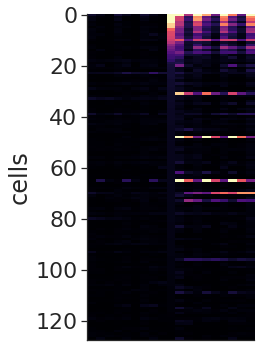

In [172]:
fig, ax = plt.subplots(figsize=(3,6))

# extract relevant portion of the trace
change_response_new = change_response[idx,int(31*1.75):int(31*6.25)]

# bin with 250 ms windows
change_response_mean = np.zeros((change_response_new.shape[0], 19))
for i, bin in enumerate(np.linspace(1.75, 6.5, 20)[:-1]):
    change_response_mean[:,i] = change_response[idx, int(31*bin):int(31*(bin+.25))].mean(axis=1)

idx = np.argsort(change_response_mean[:,9])[::-1]
    
# ax.imshow(change_response_new, vmin=0, vmax=change_response_new.max(), cmap='magma', aspect='auto')
ax.imshow(change_response_mean[idx], vmin=0, vmax=0.5*change_response_mean.max(), cmap='magma', aspect='auto')
# ax.axvline([9], color='white')

# ax.set_xticks(np.linspace(0, change_response_new.shape[1]-1, 3))
# ax.set_xticklabels([str(i) for i in np.arange(-2.25,3,2.25)])
# ax.set_xlabel('time after change (s)')

ax.set_xticks([])
ax.set_ylabel('cells')

In [171]:
fig.savefig('figures/neural_population_response_binned.png', dpi=300, bbox_inches='tight')

Text(0,0.5,'mean dF/F')

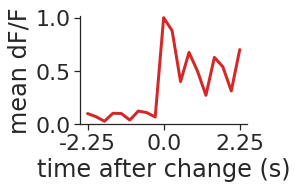

In [174]:
fig, ax = plt.subplots(figsize=(3,2))

# normalize by max
# ax.plot(change_response_new.mean(axis=0), color=colors[0], linewidth=3)
ax.plot(change_response_mean.mean(axis=0)/change_response_mean.mean(axis=0).max(), color=colors[0], linewidth=3)
# ax.set_xticks(np.linspace(0, change_response_new.shape[1]-1, 3))
ax.set_xticks(np.linspace(0, change_response_mean.shape[1]-1, 3))
ax.set_xticklabels([str(i) for i in np.arange(-2.25,3,2.25)])

ax.set_yticks([0, 0.5, 1.0])
ax.set_ylim([0, 1.02])
ax.set_xlabel('time after change (s)')
ax.set_ylabel('mean dF/F')

In [175]:
fig.savefig('figures/neural_population_response_psth.png', dpi=300, bbox_inches='tight')

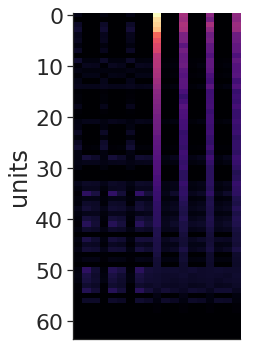

In [176]:
model_data = pickle.load(open(model_dir+'STSPNet'+'/STSPNet_A_1.pkl'))
input_act = model_data['input']
hidden_act = model_data['hidden']
labels = model_data['labels']
image = model_data['image']

# find preferred image
img_idx = [np.argwhere(image==i) for i in range(8)]
input_act_image = [input_act[i[:,0], i[:,1]].mean(axis=0) for i in img_idx]
pref_image = np.argmax(np.stack(input_act_image), axis=0)

# # find go trials
# idx = np.argwhere(labels.squeeze()==1)

# go_trial = []
# for trial in idx:
#     trial_chunk = hidden_act[trial[0], (trial[1]-9):(trial[1]+9+1)]
#     if trial_chunk.shape[0] == 19:
#         go_trial.append(trial_chunk)
        
# go_trial = np.stack(go_trial).mean(axis=0).transpose()

go_trial = np.zeros((input_act.shape[2], 19))
for cell in range(go_trial.shape[0]):
    idx = np.argwhere((labels.squeeze()==1)&(image==pref_image[cell]))
    go_trials = []
    for trial in idx:
        trial_chunk = input_act[trial[0], (trial[1]-9):(trial[1]+9+1), cell]
        if trial_chunk.shape[0] == go_trial.shape[1]:
            go_trials.append(trial_chunk)
    go_trial[cell,:] = np.stack(go_trials).mean(axis=0)

idx = np.argsort(go_trial[:,9])[::-1]

sns.set_style({'xtick.bottom': True, 'ytick.left': True,})
plt.figure(figsize=(3,6))
plt.imshow(go_trial[idx,:], vmin=0, vmax=go_trial[idx,:].max(), cmap='magma', aspect='auto')  # 0.75)  # input_act[0].transpose()[:, 12:], aspect='auto')
# plt.xticks(np.linspace(0,18,3), (-2.25, 0, 2.25))
plt.xticks([])
plt.ylabel('units')
# plt.xlabel('time after change (s)')

plt.savefig('figures/example_stsp_population_response.png', dpi=300, bbox_inches='tight')

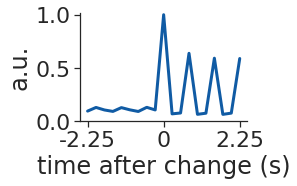

In [178]:
fig, ax = plt.subplots(figsize=(3,2))

# plt.plot(go_trial.mean(axis=0), color=colors[1], linewidth=3)
plt.plot(go_trial.mean(axis=0) / go_trial.mean(axis=0).max(), color=colors[1], linewidth=3)
plt.xticks(np.linspace(0,18,3), (-2.25, 0, 2.25))

ax.set_yticks([0, 0.5, 1.0])
ax.set_ylim([0, 1.02])
ax.set_xlabel('time after change (s)')
ax.set_ylabel('a.u.')

fig.savefig('figures/stsp_response_psth.png', dpi=300, bbox_inches='tight')

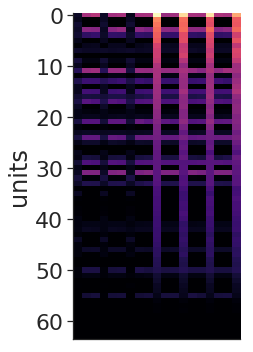

In [179]:
# model_data = pickle.load(open(results_path+'RNN'+'/omit/image_set_A/RNN_A_1.pkl'))
model_data = pickle.load(open(model_dir+'RNN'+'/RNN_A_1.pkl'))
input_act = model_data['input']
hidden_act = model_data['hidden']
labels = model_data['labels']

# find preferred image
img_idx = [np.argwhere(image==i) for i in range(8)]
input_act_image = [input_act[i[:,0], i[:,1]].mean(axis=0) for i in img_idx]
pref_image = np.argmax(np.stack(input_act_image), axis=0)

# # find go trials
# idx = np.argwhere(labels.squeeze()==1)

# go_trial = []
# for trial in idx:
#     trial_chunk = hidden_act[trial[0], (trial[1]-9):(trial[1]+9+1)]
#     if trial_chunk.shape[0] == 19:
#         go_trial.append(trial_chunk)
        
# go_trial = np.stack(go_trial).mean(axis=0).transpose()

go_trial = np.zeros((input_act.shape[2], 19))
for cell in range(go_trial.shape[0]):
    idx = np.argwhere((labels.squeeze()==1)&(image==pref_image[cell]))
    go_trials = []
    for trial in idx:
        trial_chunk = input_act[trial[0], (trial[1]-9):(trial[1]+9+1), cell]
        if trial_chunk.shape[0] == go_trial.shape[1]:
            go_trials.append(trial_chunk)
    go_trial[cell,:] = np.stack(go_trials).mean(axis=0)

idx = np.argsort(go_trial[:,9])[::-1]

sns.set_style({'xtick.bottom': True, 'ytick.left': True,})
plt.figure(figsize=(3,6))
# Note: vmax=6 before on SfN poster
plt.imshow(go_trial[idx, :], vmin=0, vmax=go_trial[idx,:].max(), cmap='magma', aspect='auto')  # input_act[0].transpose()[:, 12:], aspect='auto')
# plt.xticks(np.linspace(0,18,3), (-2.25, 0, 2.25))

plt.xticks([])
plt.ylabel('units')
# plt.xlabel('time after change (s)')

plt.savefig('figures/example_rnn_population_response.png', dpi=300, bbox_inches='tight')

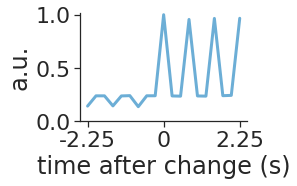

In [180]:
fig, ax = plt.subplots(figsize=(3,2))

# plt.plot(go_trial.mean(axis=0), color=colors[3], linewidth=3)
plt.plot(go_trial.mean(axis=0) / go_trial.mean(axis=0).max(), color=colors[3], linewidth=3)
plt.xticks(np.linspace(0,18,3), (-2.25, 0, 2.25))

ax.set_yticks([0, 0.5, 1.0])
ax.set_ylim([0, 1.02])
ax.set_xlabel('time after change (s)')
ax.set_ylabel('a.u.')

fig.savefig('figures/rnn_response_psth.png', dpi=300, bbox_inches='tight')

In [23]:
stsp_inp_array = []
rnn_inp_array = []
for model in ['STSPNet', 'RNN']:
    for seed in range(1,11):
        directory = model_dir+model+'/'+model+'_A_'+str(seed)+'.pkl'

        model_data = pickle.load(open(directory, 'rb'))
        
        # get necessary items
        image = model_data['image']
        label = model_data['labels'].squeeze()
        input_act = model_data['input']  # hidden']
        
#         # use go and catch images
#         mean_inp_act_go = input_act[(label==1)].mean(axis=0)
#         mean_inp_act_catch = input_act[(label==-1)].mean(axis=0)
        
        # use change and pre-change images
        idx = np.argwhere(label==1)
        mean_inp_act_go = input_act[idx[:,0], idx[:,1]].mean(axis=0)
        mean_inp_act_catch = input_act[idx[:,0], idx[:,1]-3].mean(axis=0)
        
        if model == 'STSPNet':
            stsp_inp_array.append((mean_inp_act_go, mean_inp_act_catch))
        else:
            rnn_inp_array.append((mean_inp_act_go, mean_inp_act_catch))

In [24]:
stsp_input_go = np.stack([m[0] for m in stsp_inp_array]).flatten()
stsp_input_catch = np.stack([m[1] for m in stsp_inp_array]).flatten()

rnn_input_go = np.stack([m[0] for m in rnn_inp_array]).flatten()
rnn_input_catch = np.stack([m[1] for m in rnn_inp_array]).flatten()

In [25]:
adaptation_index_stsp = (stsp_input_go - stsp_input_catch) / (stsp_input_go + stsp_input_catch)
adaptation_index_rnn = (rnn_input_go - rnn_input_catch) / (rnn_input_go + rnn_input_catch)

/home/brian/miniconda3/envs/vis-behav/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.
/home/brian/miniconda3/envs/vis-behav/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


In [26]:
# useful for filtering hidden cells (with lots of nans)
adaptation_index_rnn = adaptation_index_rnn[~np.isnan(adaptation_index_rnn)]
adaptation_index_stsp = adaptation_index_stsp[~np.isnan(adaptation_index_stsp)]

In [27]:
np.mean(adaptation_index_stsp), np.mean(adaptation_index_rnn)

(0.14281315, -0.0008273655)

In [32]:
from scipy.stats import sem, wilcoxon

In [33]:
sem(adaptation_index_stsp), sem(adaptation_index_rnn)

(0.003924716165735405, 0.0009859720783512499)

In [34]:
wilcoxon(adaptation_index_stsp), wilcoxon(adaptation_index_rnn)

(WilcoxonResult(statistic=507.0, pvalue=3.1617250186140204e-94),
 WilcoxonResult(statistic=77467.0, pvalue=0.25809154597497264))

In [55]:
import seaborn as sns
sns.set_style('white', {'xtick.bottom': True, 'ytick.left': True})
sns.set_style({'axes.spines.right': False, 'axes.spines.top': False})
sns.set_context('notebook', font_scale=2)

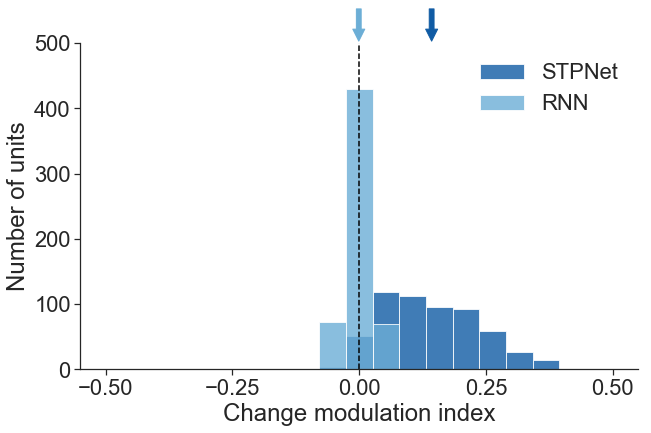

In [56]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

# useful for filtering hidden cells (with lots of nans)
adaptation_index_rnn = adaptation_index_rnn[~np.isnan(adaptation_index_rnn)]
adaptation_index_stsp = adaptation_index_stsp[~np.isnan(adaptation_index_stsp)]

# plt.hist(adaptation_index_rnn, bins=np.linspace(-0.4, 0.4, 20), color=colors[3], alpha=0.8, label='RNN')
# plt.hist(adaptation_index_stsp, bins=np.linspace(-0.4, 0.4, 20), color=colors[1], alpha=0.8, label='STSPNet')

# ax.hist(adaptation_index_rnn, bins=np.linspace(-1, 1, 20), color=colors[3], alpha=0.8, label='RNN')
# ax.hist(adaptation_index_stsp, bins=np.linspace(-1, 1, 20), color=colors[1], alpha=0.8, label='STSPNet')
ax.hist(adaptation_index_stsp, bins=np.linspace(-0.5, 0.5, 20), color=colors[1], alpha=0.8, label='STPNet')
ax.hist(adaptation_index_rnn, bins=np.linspace(-0.5, 0.5, 20), color=colors[3], alpha=0.8, label='RNN')
# ax.hist(adaptation_index_rnn, bins=np.linspace(-0.5, 0.5, 20), color=colors[3], alpha=0.8, label='RNN')
ax.axvline(0.0, color='k', linestyle='--')
# ax.set_xlim([-0.6, 0.6])  # 100])
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])  # 100])
ax.set_ylim([0, 500])  # 100])
# plt.axvline(np.nanmean(adaptation_index_rnn))
# plt.axvline(np.nanmean(adaptation_index_stsp))
ax.set_xlabel('Change modulation index')
ax.set_ylabel('Number of units')
ax.legend(frameon=False)

# NOTE: bars were originally set at 600
# # annotate
# ax.annotate("",
#             xy=(np.nanmean(adaptation_index_rnn), 300), xycoords='data',
#             xytext=(np.nanmean(adaptation_index_rnn), 333.33), textcoords='data',
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3",
#                             color=colors[3]),
#             )
# ax.annotate("",
#             xy=(np.nanmean(adaptation_index_stsp),300), xycoords='data',
#             xytext=(np.nanmean(adaptation_index_stsp), 333.33), textcoords='data',
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3",
#                             color=colors[1]),
#             )

# annotate
ax.annotate("",
            xy=(np.nanmean(adaptation_index_rnn), 500), xycoords='data',
            xytext=(np.nanmean(adaptation_index_rnn), (10./9)*500), textcoords='data',
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3",
                            color=colors[3]),
            )
ax.annotate("",
            xy=(np.nanmean(adaptation_index_stsp), 500), xycoords='data',
            xytext=(np.nanmean(adaptation_index_stsp), (10./9)*500), textcoords='data',
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3",
                            color=colors[1]),
            )


plt.savefig('figures/adaptation_index_model_new_v2.png', dpi=300, bbox_inches='tight')